In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

### Eq. 1

$$
    8.0x^4+(1.0t_2^4-1.0it_2^2-1.0)x^2+1.0t_1^4+1.0t_1^2-1.0it_1-1.0 \\
    t_1,t_2 \in \mathbb{C}, \hspace{1cm} |t_1|=|t_2|=1
$$

In [3]:
"""
Very slow, but allows to use higher degree polynomials.
~
"""

angles = np.random.uniform(0, 2*np.pi, 600)
N_ts = 3_000_000
t_1s = [np.exp(ang * 1j) for ang in np.random.uniform(0, 2*np.pi, N_ts)]
t_2s = [np.exp(ang * 1j) for ang in np.random.uniform(0, 2*np.pi, N_ts)]
ts = np.column_stack([t_1s, t_2s])

poly_degree = 4
pts = np.zeros((poly_degree * len(ts),)).astype(complex)
for i in range(len(ts)):
    t_1 = ts[i][0]
    t_2 = ts[i][1]
    # (8.0)x^4 + (1.0t_2^4-1.0it_2^2-1.0)x^2 + (1.0t_1^4+1.0t_1^2-1.0it_1-1.0)
    poly = np.poly1d([
        8.0,                                # x^4
        0.0,                                # x^3
        t_2**4 - 1.0j * t_2**2 - 1.0,       # x^2
        0.0,                                # x
        t_1**4 + t_1**2 - 1.0j * t_1 - 1.0  #
    ])
    roots = poly.roots
    pts[poly_degree*i:poly_degree*i+poly_degree] = roots

In [37]:
"""
Much faster by taking advantage of NumPy's vectorization.
~0.4s
"""

N_ts = 3_000_000
ts = np.exp(np.random.uniform(0, 2*np.pi, 2 * N_ts) * 1j)
ts = ts.reshape((N_ts, 2))
K = ts[:,1]**4 - 1.0j * ts[:,1]**2 - 1.0
J = ts[:,0]**4 + ts[:,0]**2 - 1.0j * ts[:,0] - 1.0
z1 = (-K + np.sqrt(K**2 - 32*J)) / 16
z2 = (-K - np.sqrt(K**2 - 32*J)) / 16
x1 = np.sqrt(z1)
x2 = np.sqrt(z2)
x3 = -np.sqrt(z1)
x4 = -np.sqrt(z2)
pts = np.column_stack([x1, x2, x3, x4]).flatten()

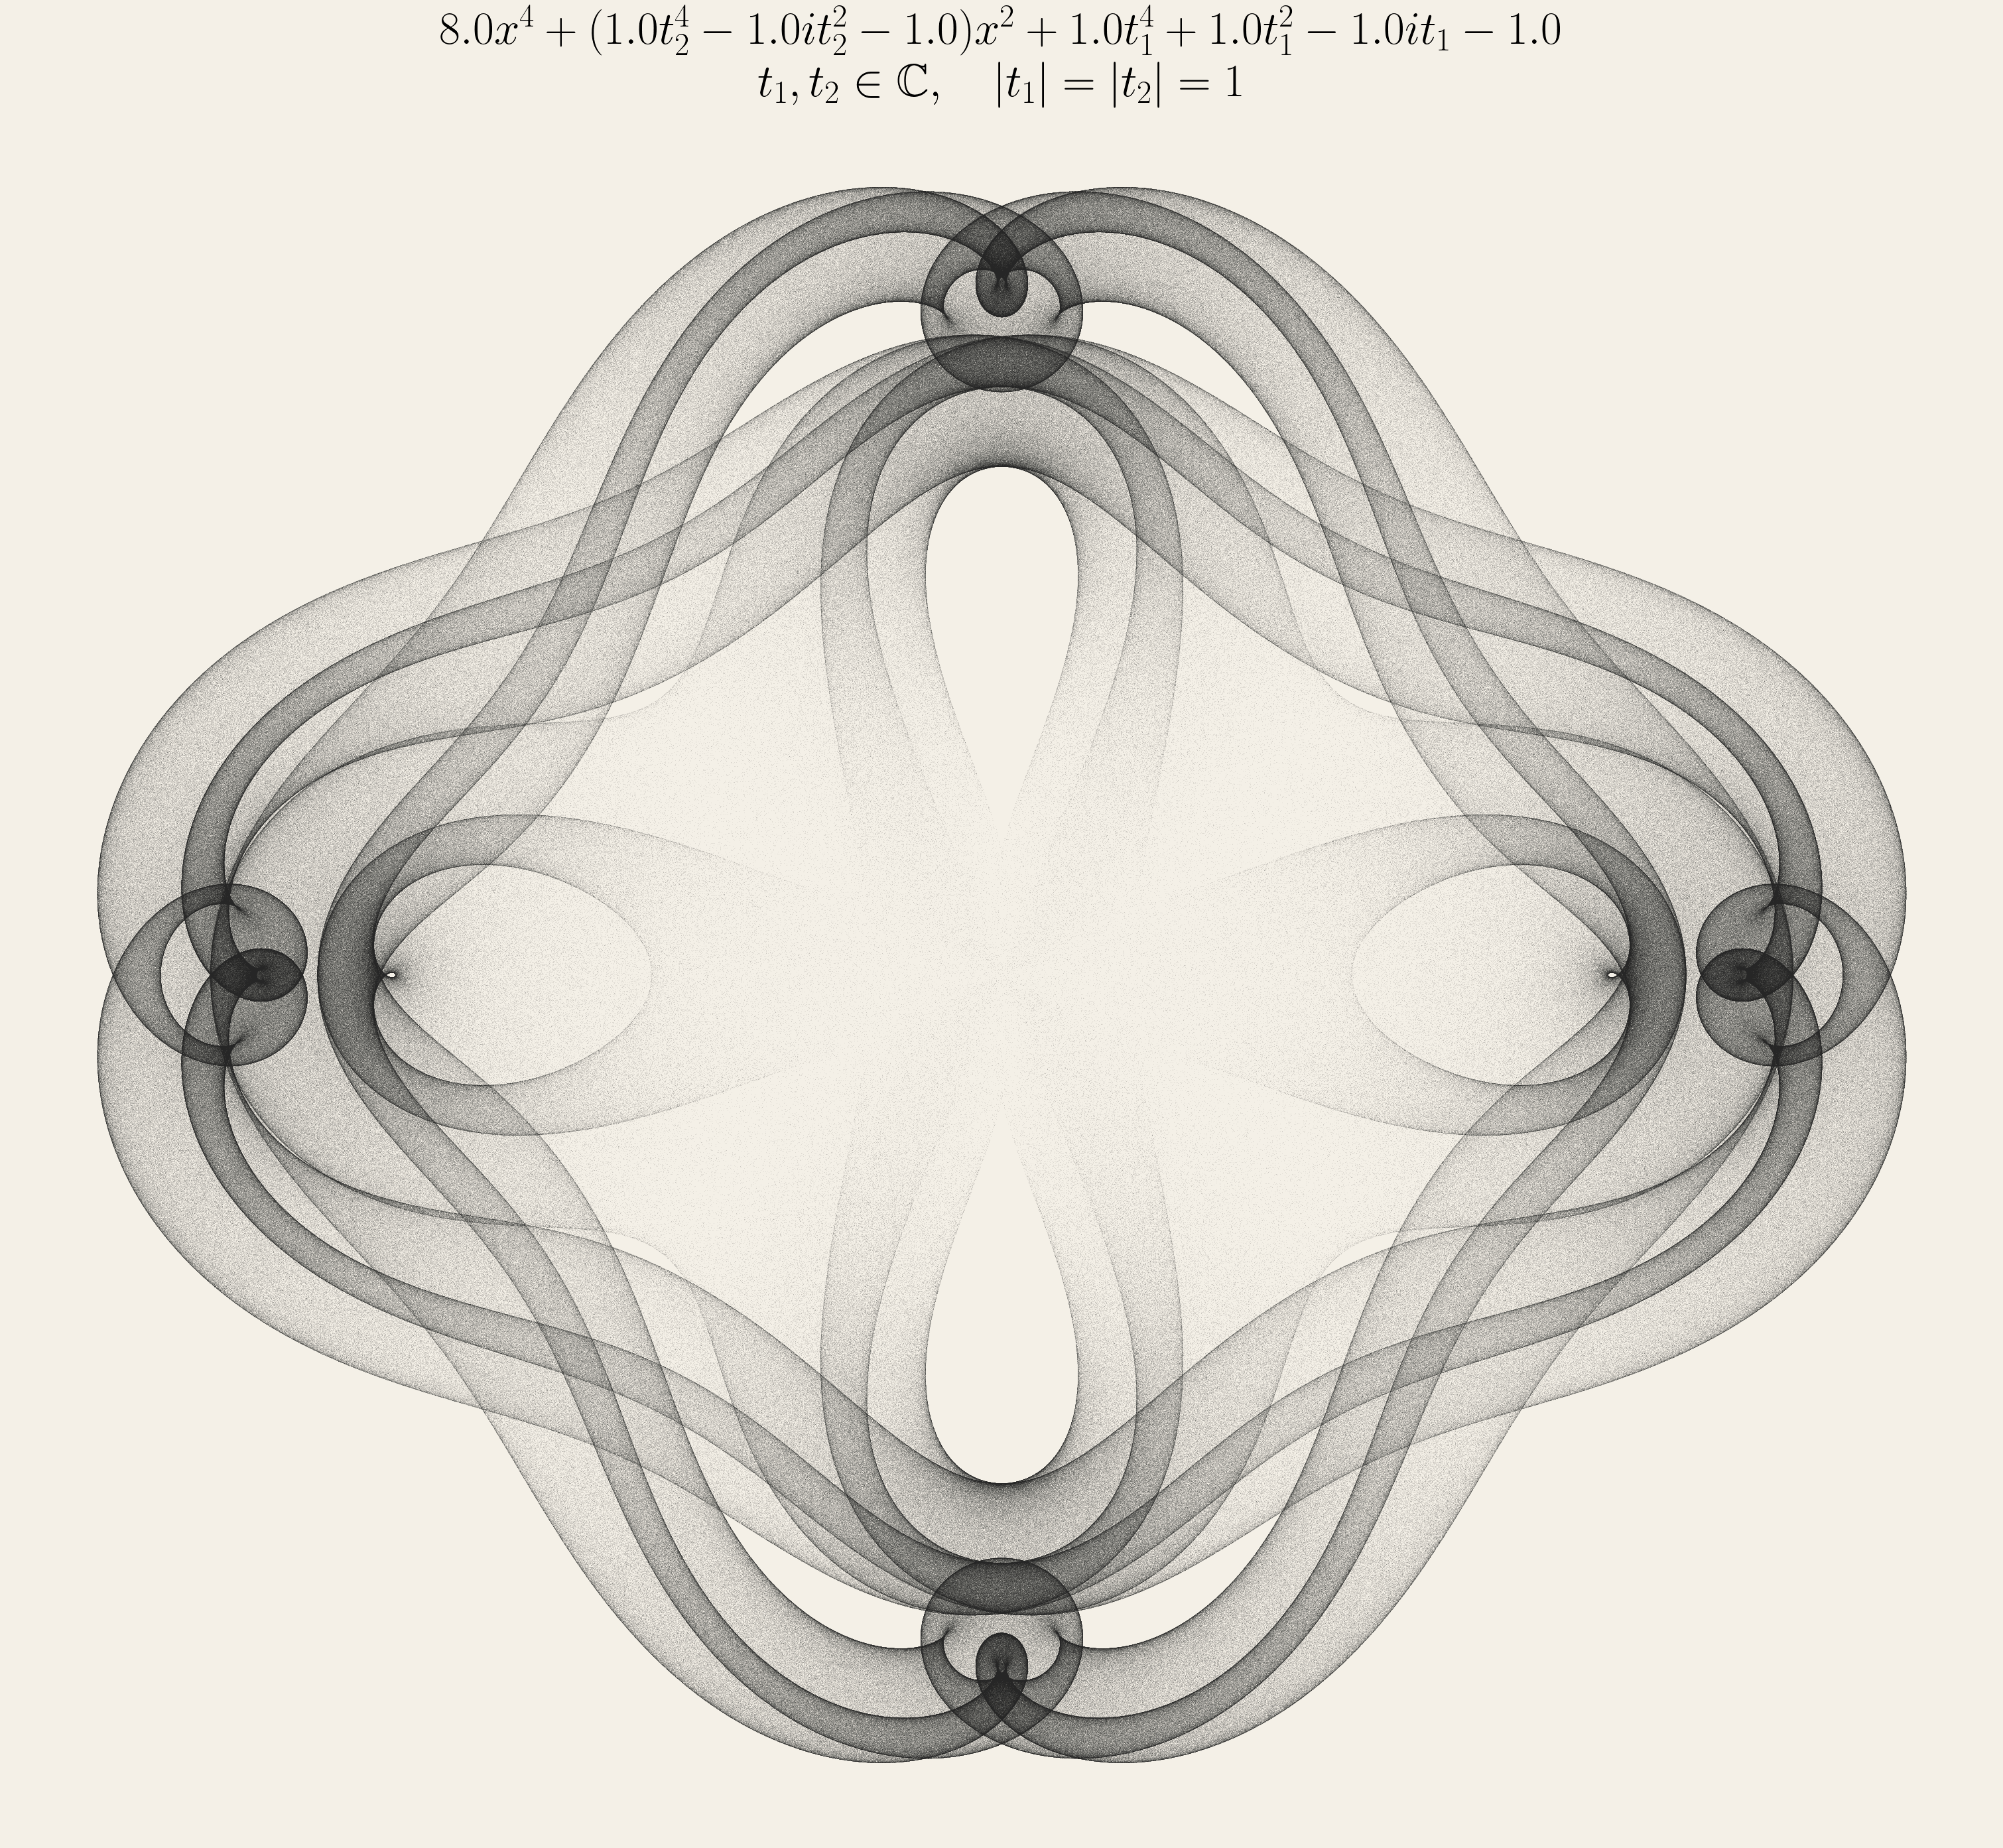

In [40]:
mpl.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
fig,ax = plt.subplots(figsize=(30,30))
fig.set_facecolor("#f4f0e7")
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
for spine in ['top', 'right','left','bottom']:
    ax.spines[spine].set_visible(False)
ax.scatter(
    x=pts.real, 
    y=pts.imag, 
    c="#262626",
    s=0.035,
    linewidths=1e-6)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_title('$8.0x^4+(1.0t_2^4-1.0it_2^2-1.0)x^2+1.0t_1^4+1.0t_1^2-1.0it_1-1.0$ \n' +  r'$t_1,t_2 \in \mathbb{C}, \ \ \ |t_1|=|t_2|=1$', fontsize=50)
plt.show()